# US ELECTRIC CAR PROJECT CAPSTONE

## objective
TO CONDUCT A DETAILED ANALYSIS OF A CHOSEN DATASET,
UNCOVERING INSIGHTS, TRENDS, AND PATTERNS THROUGH DATA
PREPROCESSING, EXPLORATORY DATA ANALYSIS (EDA),
AND VISUALIZATION.

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [116]:
state_codes = pd.read_excel('state_codes.xlsx')
all_veh_reg = pd.read_excel('States_All_Vehicle_Registrations_2018 (1).xlsx',header = None)
e_veh_reg = pd.read_excel('States_Electric_Vehicle_Registrations_2018.xlsx',header = None)
energy_gen = pd.read_excel('States_Annual_Energy_Generation_Sources_1990_2019.xlsx',header = None)

In [117]:
state_codes

,state_code,state_name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DC,District of Columbia
8,DE,Delaware
9,FL,Florida


# all_veh_reg

In [119]:
all_veh_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE MOTOR-VEHICLE REGISTRATIONS - 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,December 2019,(Revised February 2021),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TABLE MV-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,West Virginia (2),547961,12157,560118,226,2946.265875,3172.265875,1044351,25395.31695,1069746.31695,59403,1279.888515,60682.888515,1651941,41778.47134,1693719.47134
61,Wisconsin,2055788,31730,2087518,14887.880896,3.810292,14891.691188,3190703,53538.430928,3244241.430928,335995,415,336410,5597373.880896,85687.24122,5683061.122116
62,Wyoming,200217,3329,203546,2563.099955,1495.137699,4058.237654,588345,12106.833565,600451.833565,28964,4,28968,820089.099955,16934.971264,837024.071219
63,Total,109813571,1428561,111242132,575613.83017,416538.307166,992152.137337,150398354,2303276.859669,152701630.859669,8630345,29396.126724,8659741.126724,269417883.83017,4177772.293559,273595656.123729


In [120]:
all_veh_reg.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE MOTOR-VEHICLE REGISTRATIONS - 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,December 2019,(Revised February 2021),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TABLE MV-1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,AUTOMOBILES,NaN,NaN,BUSES,NaN,NaN,TRUCKS,NaN,NaN,MOTORCYCLES,NaN,NaN,ALL MOTOR VEHICLES,NaN,NaN
8,STATE,PRIVATE AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,COMMERCIAL,PUBLICLY,NaN,PRIVATE AND,PUBLICLY,NaN,PRIVATE AND,PUBLICLY,NaN,PRIVATE AND,PUBLICLY,NaN,PRIVATE AND,PUBLICLY,NaN


In [121]:
# droping other comulms as we only need cars for our project
all_veh_reg.drop([1,2,4,5,6,7,8,9,10,11,12,13,14,15],axis = 1,inplace = True)
all_veh_reg.drop([63],axis = 0,inplace = True)

In [122]:
all_veh_reg.isnull().sum()

0     8
3    12
dtype: int64

In [123]:
all_veh_reg.dropna(inplace = True)

In [124]:
all_veh_reg.columns = ['state','total_cars']

In [125]:
all_veh_reg.reset_index(drop = True,inplace = True)

In [126]:
all_veh_reg

,state,total_cars
0,Alabama,2161212
1,Alaska,183270
2,Arizona,2391772
3,Arkansas,921161
4,California,15065827
5,Colorado,1798177
6,Connecticut,1306709
7,Delaware,433363
8,Dist. of Col.,209723
9,Florida,7966091


In [127]:
all_veh_reg.duplicated().sum()

0

In [128]:
all_veh_reg.total_cars.mean()

2181218.274509804

In [129]:
all_veh_reg.total_cars = all_veh_reg.total_cars.astype(int)

In [130]:
all_veh_reg.groupby('state')['total_cars'].mean().sort_values(ascending = False)

state
California           15065827.0
Texas                 8248322.0
Florida               7966091.0
New York              4712779.0
Ohio                  4603594.0
Illinois              4477763.0
Pennsylvania          4424183.0
Georgia               3557469.0
North Carolina        3393781.0
Virginia              3267735.0
Michigan              3023940.0
Washington            2964939.0
New Jersey            2754253.0
Arizona               2391772.0
Tennessee             2285329.0
Indiana               2248870.0
Massachusetts (2)     2182530.0
Alabama               2161212.0
Missouri              2102216.0
Wisconsin             2087518.0
Minnesota             1976525.0
Maryland              1922463.0
South Carolina        1830186.0
Colorado              1798177.0
Kentucky              1721942.0
Oregon                1488623.0
Louisiana             1389249.0
Connecticut           1306709.0
Oklahoma (2)          1296219.0
Iowa                  1242219.0
Nevada                1073760.0
Ka

# 5 state with highest registration counts of cars
California           
Texas                 
Florida               
New York              
Ohio                  

# 5 states with lowest registration counts of cars

North Dakota           
Vermont                
Dist. of Col.          
Wyoming                
Alaska                 

Text(0.5, 1.0, 'cars registration according to state')

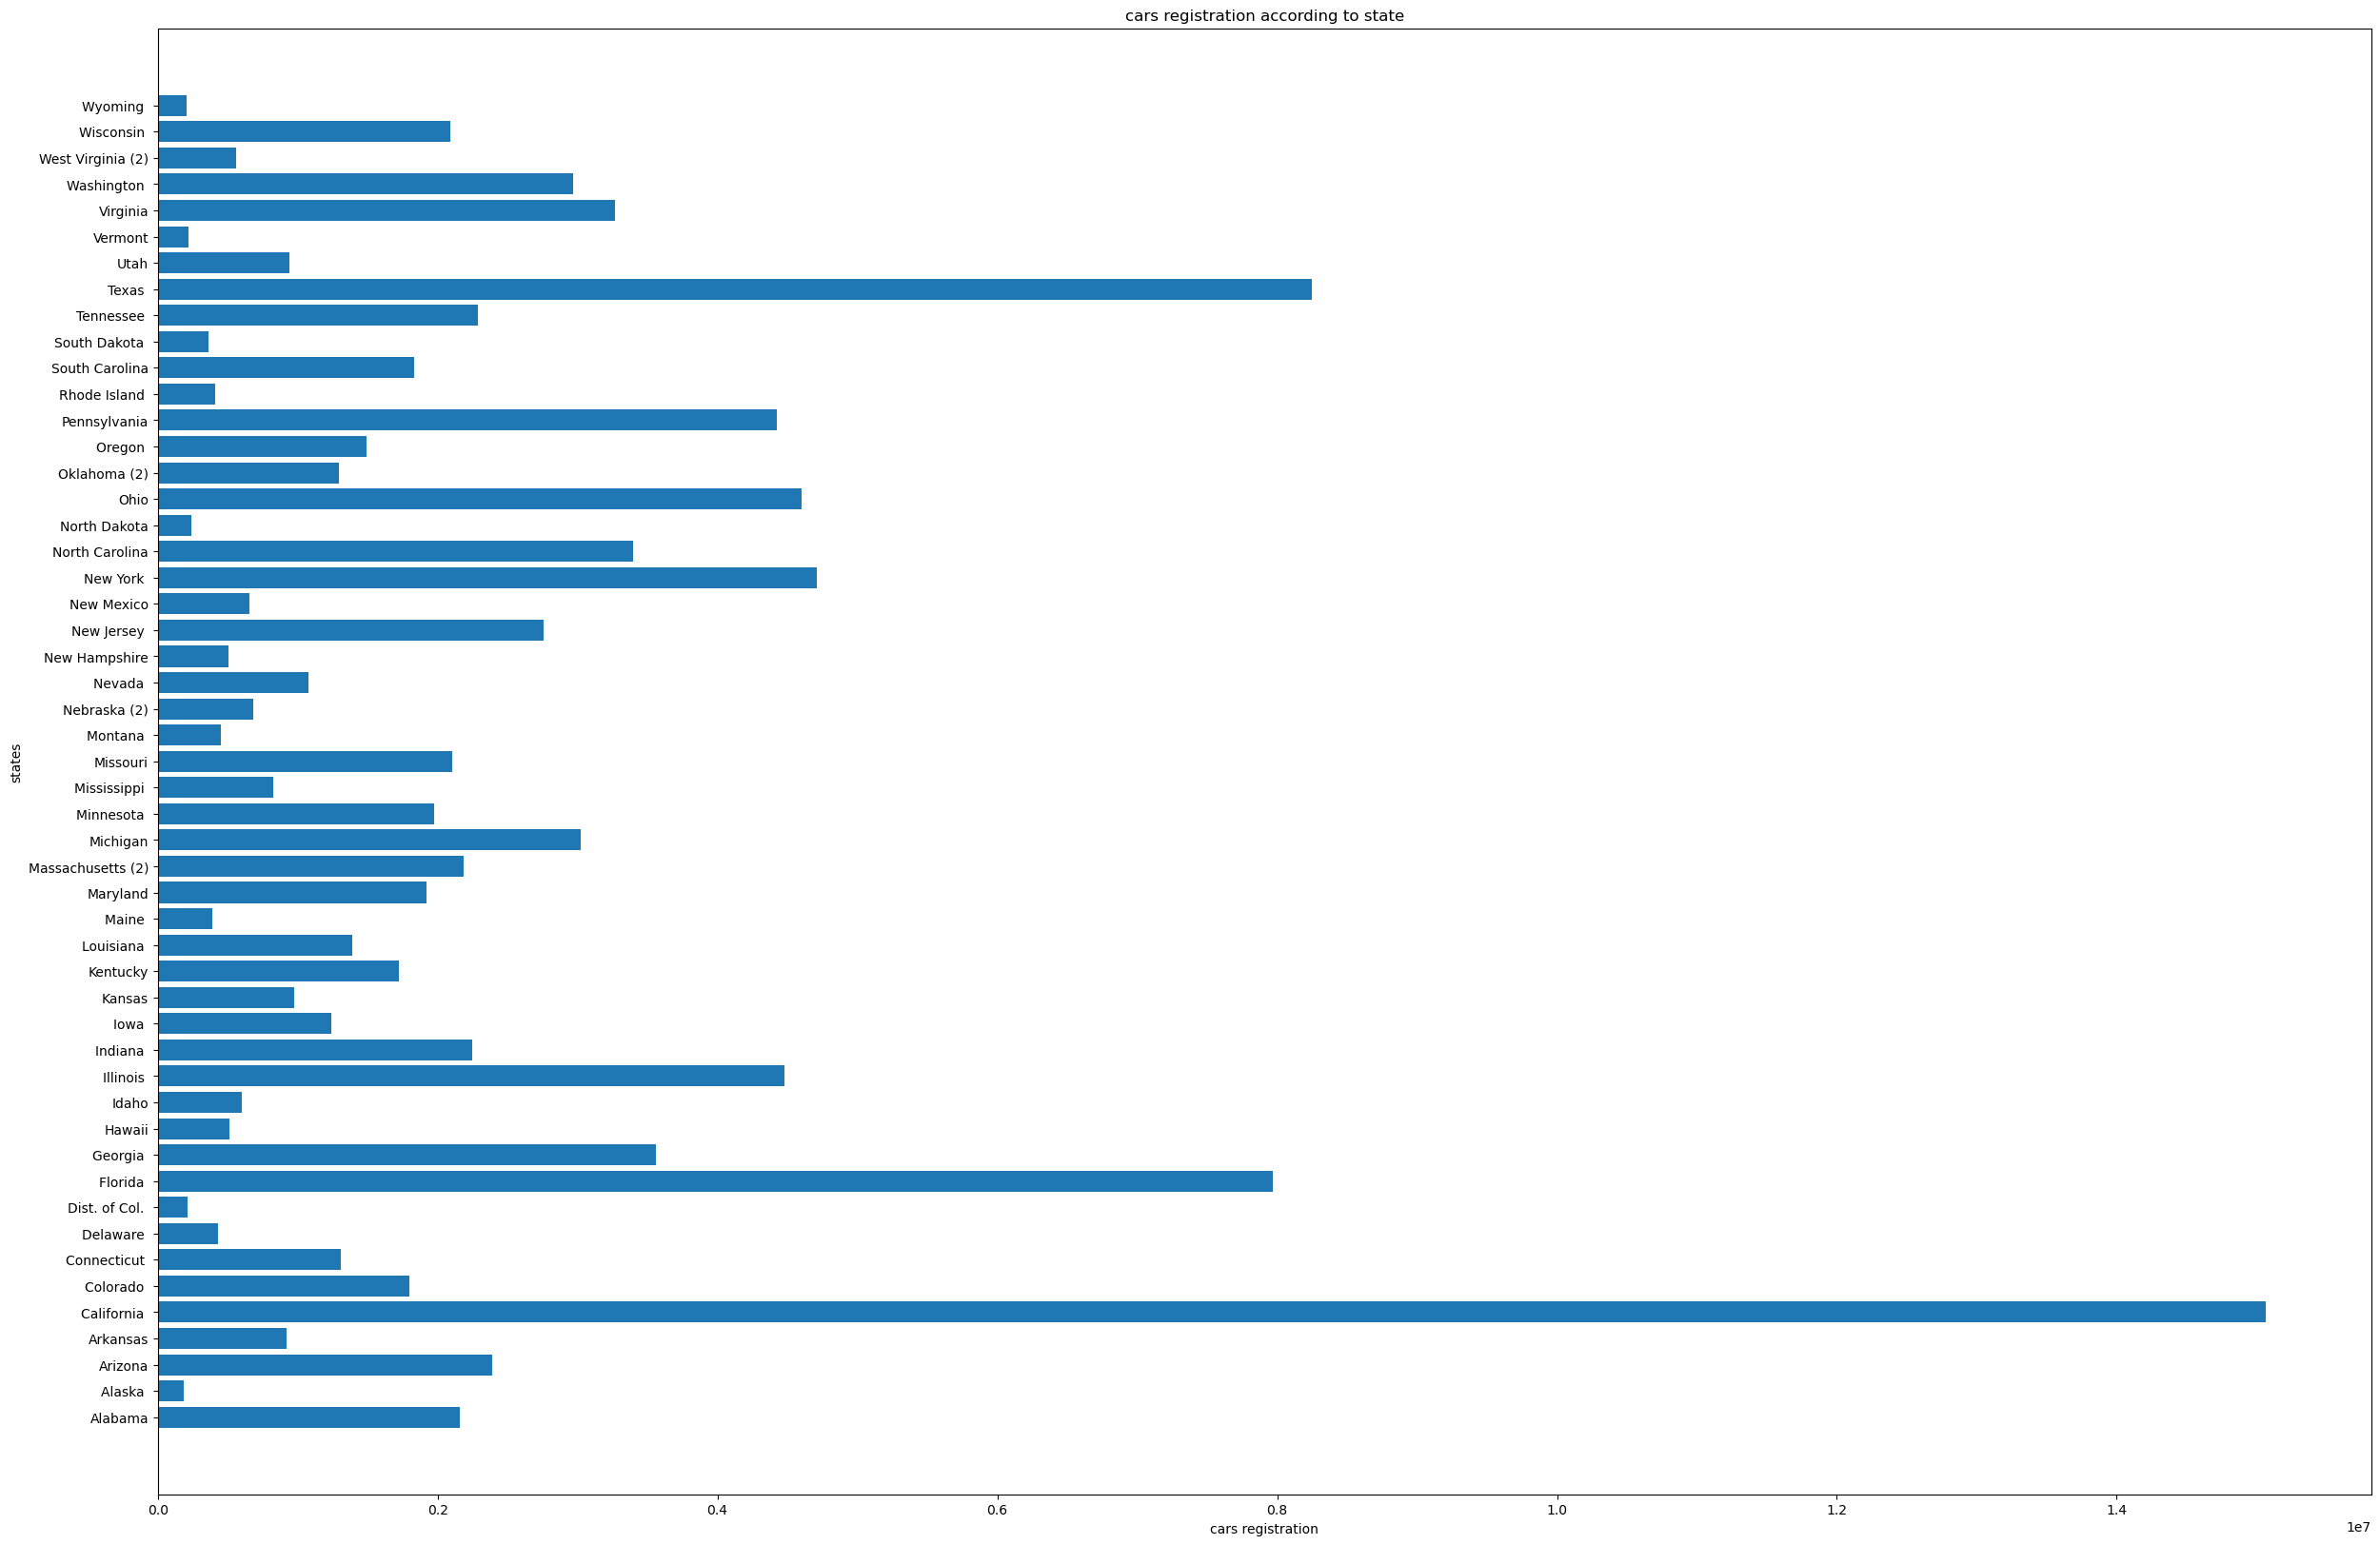

In [133]:
plt.figure(figsize = (30,20))
plt.barh(all_veh_reg.state,all_veh_reg.total_cars)
plt.xlabel('cars registration')
plt.ylabel('states')
plt.title('cars registration according to state')

In [134]:
all_veh_reg.total_cars.mean()

2181218.274509804

Text(0.5, 1.0, 'distribution of cars registrations')

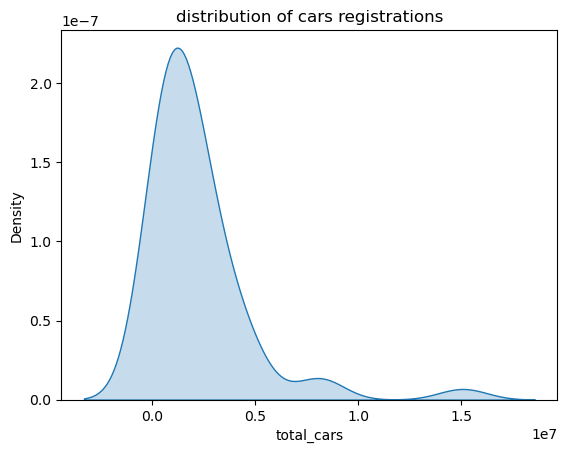

In [135]:
sns.kdeplot(all_veh_reg.total_cars,fill = True)
plt.title('distribution of cars registrations')

# electrical cars

In [137]:
e_veh_reg

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Electric Vehicle Registrations by State,NaN,NaN,NaN
2,NaN,State,Registration Count,NaN,NaN
3,NaN,Alabama,1450,NaN,NaN
4,NaN,Alaska,530,NaN,NaN
5,NaN,Arizona,15000,NaN,NaN
6,NaN,Arkansas,520,NaN,NaN
7,NaN,California,256800,NaN,NaN
8,NaN,Colorado,11700,NaN,NaN
9,NaN,Connecticut,4450,NaN,NaN


In [138]:
e_veh_reg.drop([0,1,2,54],axis = 0,inplace = True)
e_veh_reg.drop([0,3,4],axis = 1,inplace = True)
e_veh_reg.columns = ['state','registration_counts']

In [139]:
e_veh_reg.isnull().sum()

state                  0
registration_counts    0
dtype: int64

In [140]:
e_veh_reg.reset_index(drop = True,inplace = True)

In [141]:
e_veh_reg

,state,registration_counts
0,Alabama,1450
1,Alaska,530
2,Arizona,15000
3,Arkansas,520
4,California,256800
5,Colorado,11700
6,Connecticut,4450
7,Delaware,720
8,District Of Columbia,970
9,Florida,25200


In [142]:
e_veh_reg.registration_counts.mean()

10659.019607843138

In [143]:
e_veh_reg.duplicated().sum()

0

In [144]:
e_veh_reg.groupby('state')['registration_counts'].mean().sort_values(ascending = False)

state
California              256800.0
Washington               28400.0
Florida                  25200.0
Texas                    22600.0
New York                 16600.0
Georgia                  15300.0
Arizona                  15000.0
Illinois                 12400.0
Oregon                   12400.0
New Jersey               12100.0
Colorado                 11700.0
Massachusetts             9760.0
Virginia                  8370.0
Maryland                  8080.0
Pennsylvania              7990.0
North Carolina            7320.0
Hawaii                    6590.0
Ohio                      6510.0
Utah                      5220.0
Nevada                    4810.0
Minnesota                 4740.0
Connecticut               4450.0
Michigan                  4210.0
Tennessee                 3980.0
Wisconsin                 3680.0
Missouri                  3450.0
Oklahoma                  3290.0
Indiana                   3030.0
South Carolina            1950.0
Kansas                    1610.0
Alab

Text(0.5, 1.0, 'electronic car registrations')

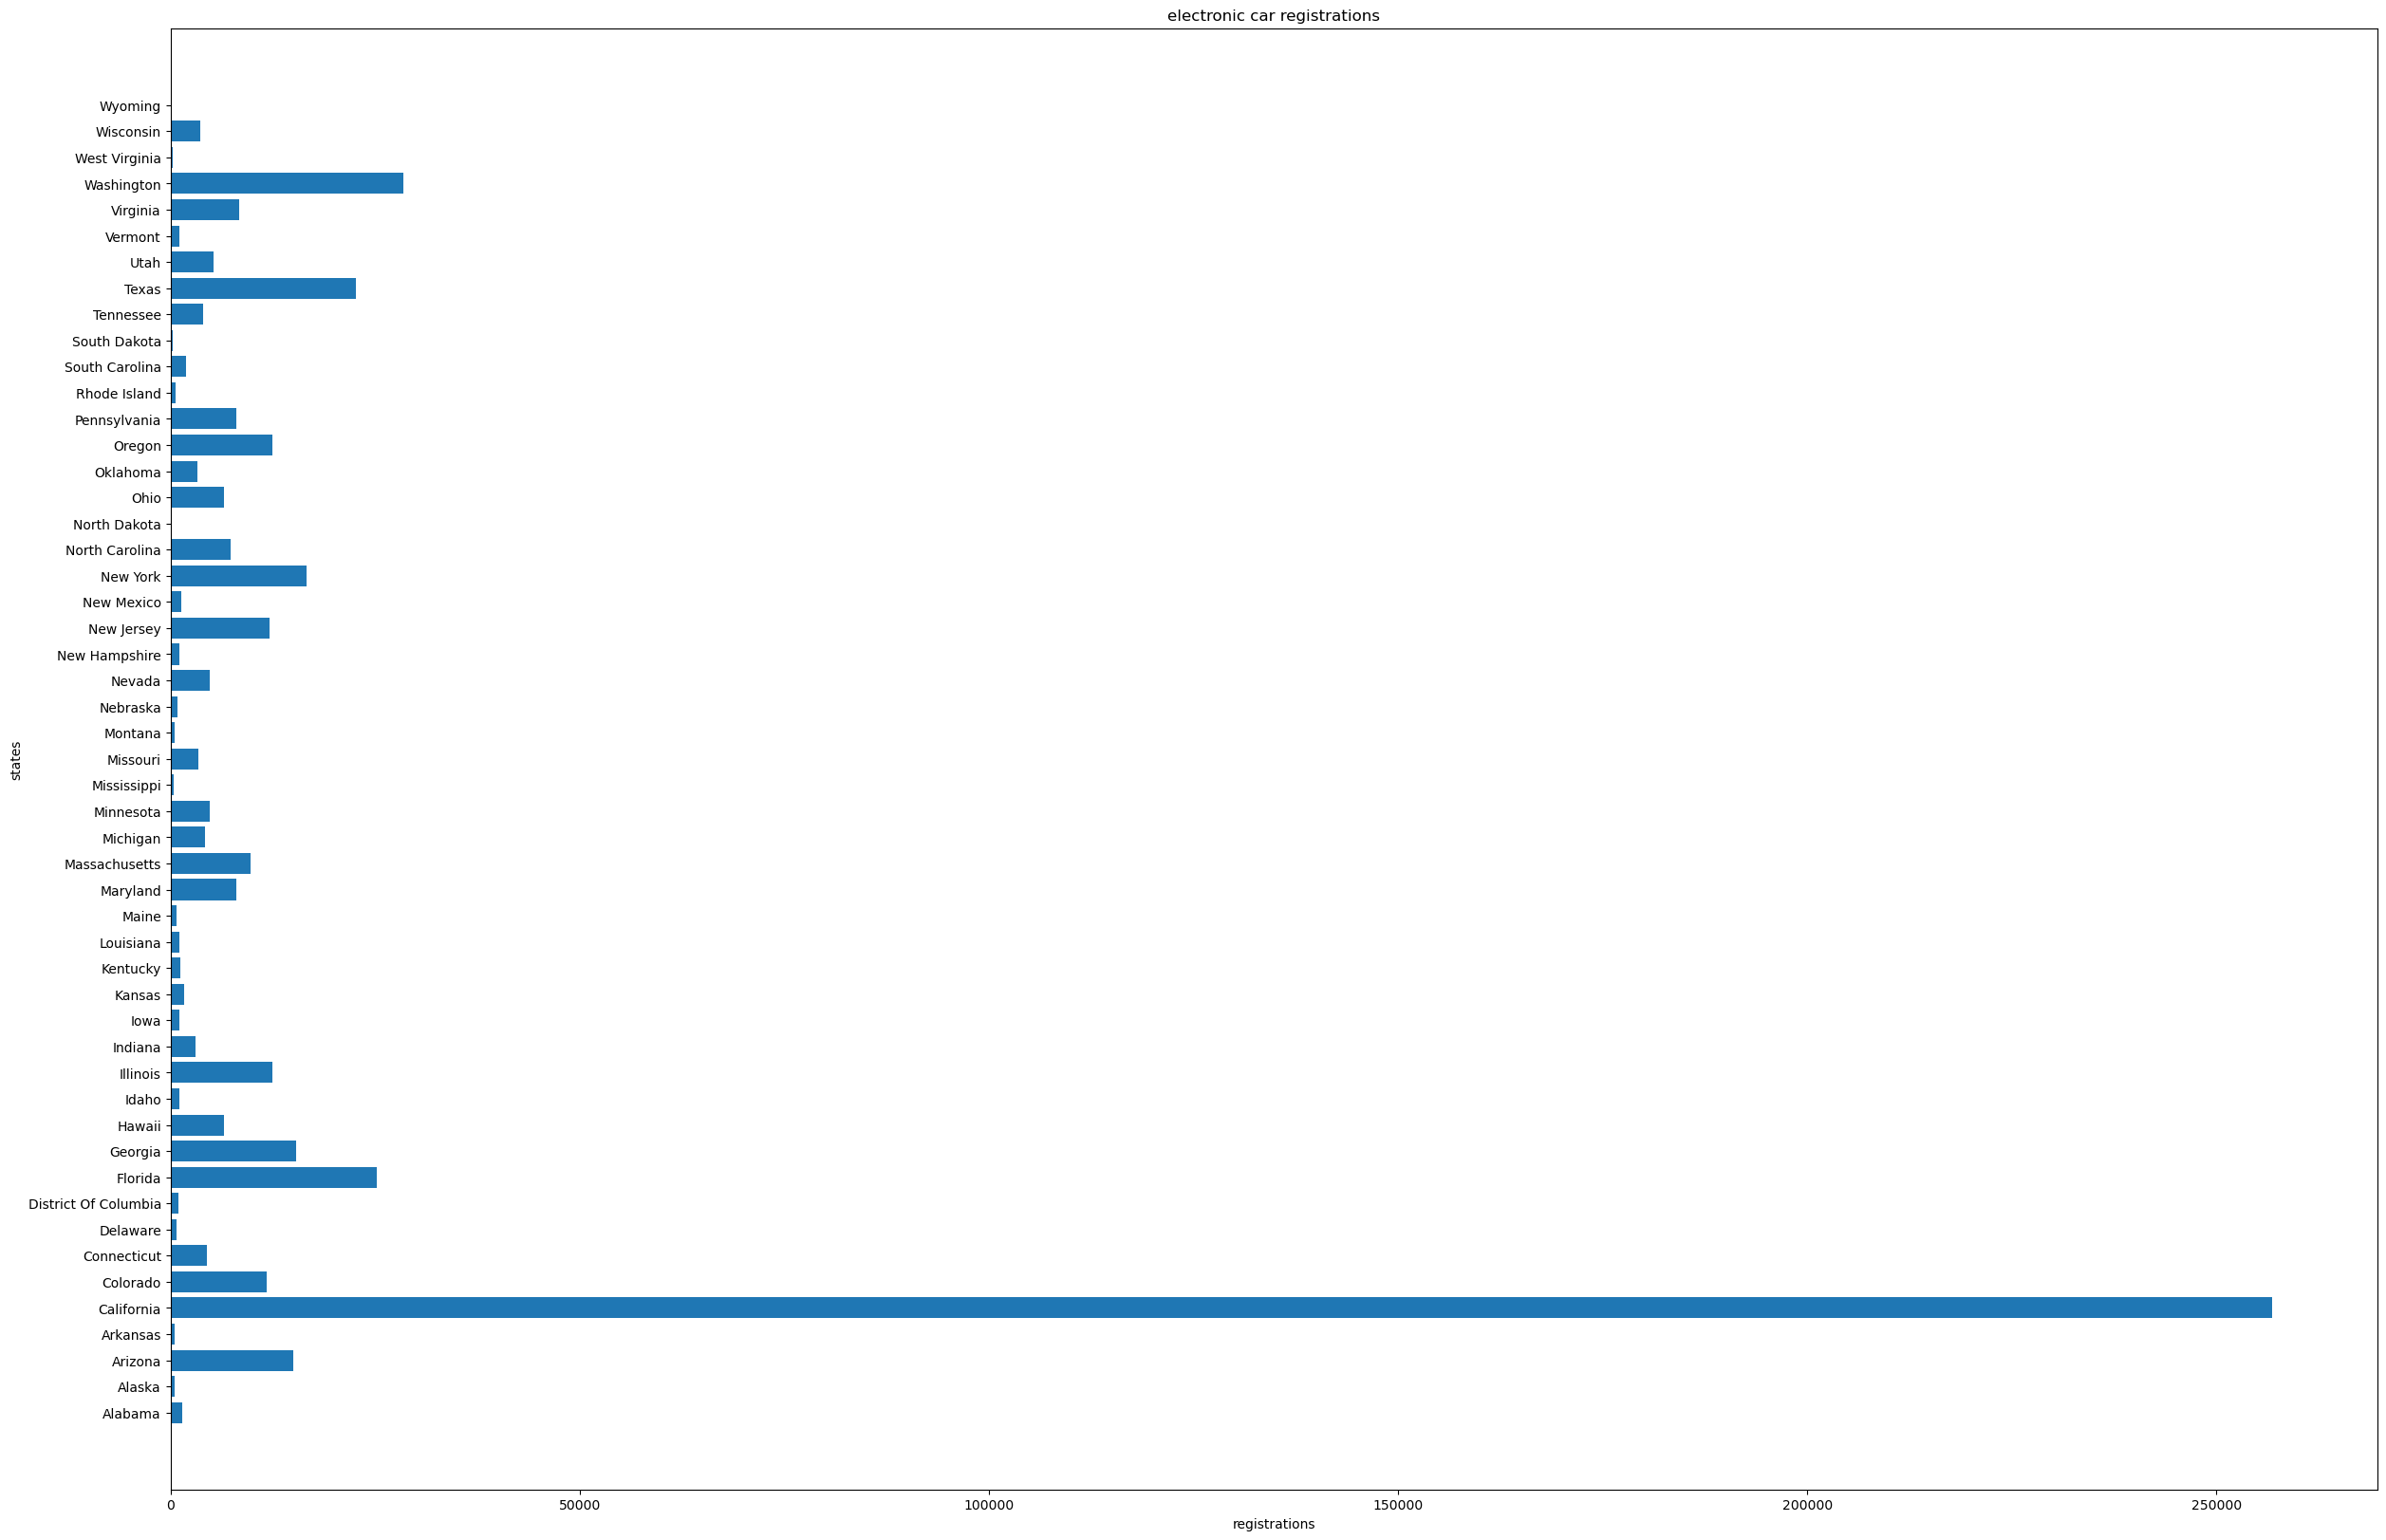

In [145]:
plt.figure(figsize = (30,20))
plt.barh(e_veh_reg.state,e_veh_reg.registration_counts)
plt.xlabel('registrations')
plt.ylabel('states')
plt.title('electronic car registrations')

# 5 states with maximum electronic cars registration

- California              
- Washington               
- Florida                  
- Texas                    
- New York 

# 5 states with lowest number of electronic cars registration

- Mississippi                
- South Dakota               
- West Virginia              
- North Dakota               
- Wyoming

Text(0.5, 1.0, 'distribution of electric cars registrations')

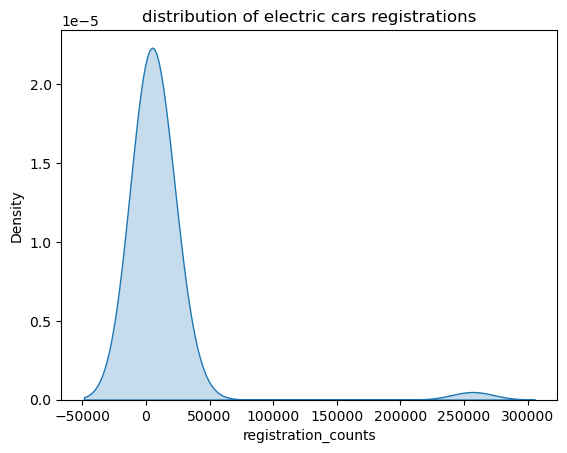

In [148]:
sns.kdeplot(e_veh_reg.registration_counts,fill = True)
plt.title('distribution of electric cars registrations')

# energy generation

In [150]:
energy_gen

,0,1,2,3,4
0,State Historical Tables for 2019\nReleased: Se...,NaN,NaN,NaN,NaN
1,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
2,1990,AK,Total Electric Power Industry,Total,5599506
3,1990,AK,Total Electric Power Industry,Coal,510573
4,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
...,...,...,...,...,...
53753,2019,WY,"Electric Generators, Electric Utilities",Coal,34313690
53754,2019,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,984521
53755,2019,WY,"Electric Generators, Electric Utilities",Natural Gas,411640
53756,2019,WY,"Electric Generators, Electric Utilities",Petroleum,43547


In [151]:
energy_gen.head(10)

,0,1,2,3,4
0,State Historical Tables for 2019\nReleased: Se...,NaN,NaN,NaN,NaN
1,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
2,1990,AK,Total Electric Power Industry,Total,5599506
3,1990,AK,Total Electric Power Industry,Coal,510573
4,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
5,1990,AK,Total Electric Power Industry,Natural Gas,3466261
6,1990,AK,Total Electric Power Industry,Petroleum,497116
7,1990,AK,Total Electric Power Industry,Wind,0
8,1990,AK,Total Electric Power Industry,Wood and Wood Derived Fuels,151035
9,1990,AK,"Electric Generators, Electric Utilities",Total,4493024


In [152]:
energy_gen.drop([0,1],axis = 0,inplace = True)

In [153]:
energy_gen.duplicated().sum()

0

In [154]:
energy_gen.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [155]:
energy_gen.columns = ['year','state','type_of_producer','energy_source','generation']

In [156]:
energy_gen.reset_index(drop = True,inplace = True)

In [157]:
energy_gen

,year,state,type_of_producer,energy_source,generation
0,1990,AK,Total Electric Power Industry,Total,5599506
1,1990,AK,Total Electric Power Industry,Coal,510573
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261
4,1990,AK,Total Electric Power Industry,Petroleum,497116
...,...,...,...,...,...
53751,2019,WY,"Electric Generators, Electric Utilities",Coal,34313690
53752,2019,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,984521
53753,2019,WY,"Electric Generators, Electric Utilities",Natural Gas,411640
53754,2019,WY,"Electric Generators, Electric Utilities",Petroleum,43547


In [158]:
energy_gen.generation.mean()

16931307.319824826

In [159]:
energy_gen.type_of_producer.value_counts()

type_of_producer
Total Electric Power Industry                       14783
Electric Generators, Electric Utilities             10602
Combined Heat and Power, Industrial Power            8989
Electric Generators, Independent Power Producers     8535
Combined Heat and Power, Commercial Power            5653
Combined Heat and Power, Electric Power              5194
Name: count, dtype: int64

Text(0.5, 1.0, 'types of producers')

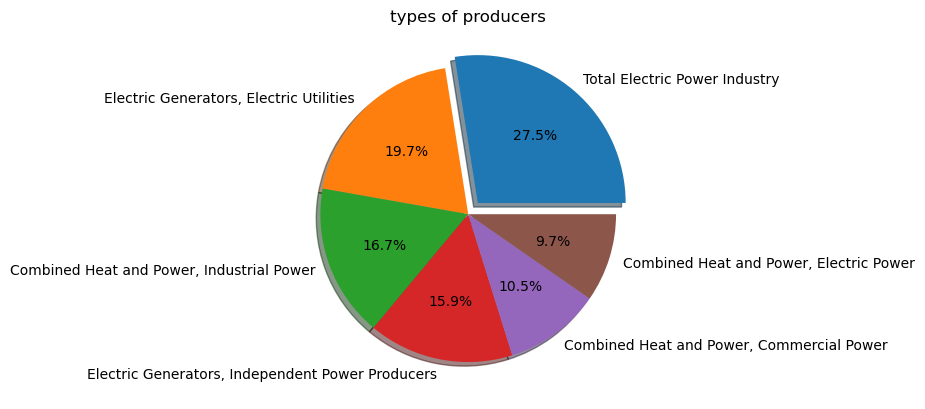

In [160]:
plt.pie(energy_gen.type_of_producer.value_counts(),shadow = True,autopct = '%1.1f%%',explode = [0.1,0,0,0,0,0],labels = energy_gen.type_of_producer.value_counts().index)
plt.title('types of producers')

In [161]:
energy_gen.groupby('type_of_producer')['generation'].mean()

type_of_producer
Combined Heat and Power, Commercial Power             194891.995399
Combined Heat and Power, Electric Power              3440989.301619
Combined Heat and Power, Industrial Power            1957876.745626
Electric Generators, Electric Utilities             29736655.698327
Electric Generators, Independent Power Producers     12095849.73682
Total Electric Power Industry                       30783986.884803
Name: generation, dtype: object

Text(0.5, 1.0, 'average energy generation according to types of producers ')

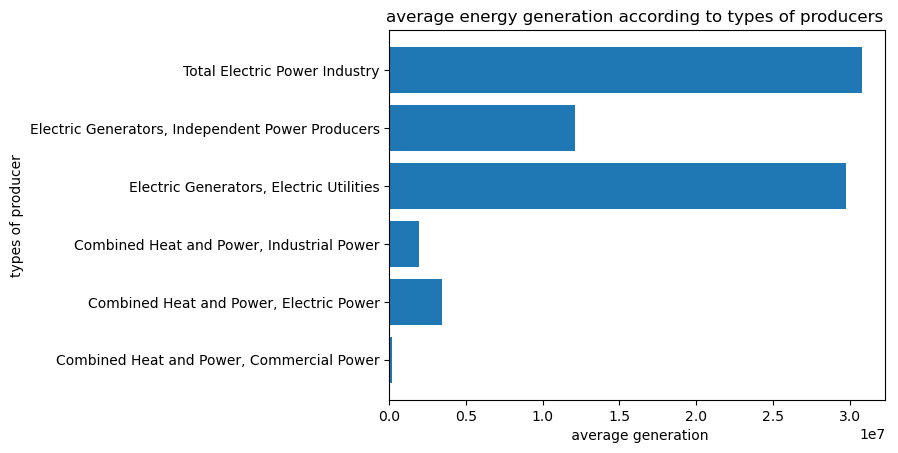

In [162]:
plt.barh(energy_gen.groupby('type_of_producer')['generation'].mean().index,energy_gen.groupby('type_of_producer')['generation'].mean())
plt.xlabel(' average generation')
plt.ylabel('types of producer')
plt.title('average energy generation according to types of producers ')

In [177]:
energy_gen.groupby('energy_source')['generation'].mean()

energy_source
Coal                              36993608.929178
Geothermal                          4175280.89269
Hydroelectric Conventional         7425905.880103
Natural Gas                       13234632.349705
Nuclear                           44634711.942828
Other                               374953.048754
Other Biomass                       456516.260222
Other Gases                         724572.034546
Petroleum                          1246244.073147
Pumped Storage                         -560921.72
Solar Thermal and Photovoltaic      862966.943592
Total                             54572452.107657
Wind                               4247346.611445
Wood and Wood Derived Fuels        1328668.658026
Name: generation, dtype: object

In [178]:
Energy_gen = energy_gen[energy_gen.energy_source != 'Total']

In [179]:
Energy_gen.groupby('energy_source')['generation'].mean()

energy_source
Coal                              36993608.929178
Geothermal                          4175280.89269
Hydroelectric Conventional         7425905.880103
Natural Gas                       13234632.349705
Nuclear                           44634711.942828
Other                               374953.048754
Other Biomass                       456516.260222
Other Gases                         724572.034546
Petroleum                          1246244.073147
Pumped Storage                         -560921.72
Solar Thermal and Photovoltaic      862966.943592
Wind                               4247346.611445
Wood and Wood Derived Fuels        1328668.658026
Name: generation, dtype: object

Text(0.5, 1.0, 'average energy generation by energy sources')

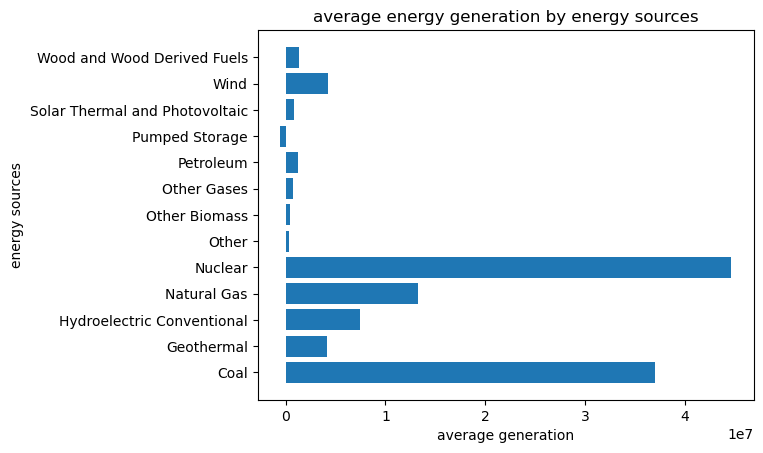

In [180]:
plt.barh(Energy_gen.groupby('energy_source')['generation'].mean().index,Energy_gen.groupby('energy_source')['generation'].mean())
plt.xlabel('average generation')
plt.ylabel('energy sources')
plt.title('average energy generation by energy sources')

In [181]:
energy_gen.groupby('state')['generation'].mean()

state
                         0.0
AK             964456.187033
AL           16248297.623424
AR             6247124.06408
AZ           12364858.742573
CA           13261871.676914
CO            5059908.525619
CT            3433321.327975
DC              91802.239106
DE             1336676.48387
FL           18636050.686492
GA           13062182.378788
HI            1287147.136888
IA            5111353.450381
ID            1900123.220599
IL           16560139.721103
IN           13383860.582995
KS            8254247.100203
KY           17545909.324321
LA           10924514.103836
MA            3671854.468172
MD            4580952.399423
ME            1559914.444005
MI             8556035.58852
MN             4744204.26143
MO            9307243.585904
MS            6990318.343172
MT            4178760.308764
NC           10527702.405982
ND            6012192.176814
NE            4977153.016029
NH            2361933.568538
NJ            5932029.672935
NM            5411170.403828
NV      

In [182]:
 ren_energy_source =energy_gen[(energy_gen.energy_source == 'Wind') | (energy_gen.energy_source == 'Solar Thermal and Photovoltaic')]

In [183]:
 ren_energy_source.state = ren_energy_source.state.replace('US-TOTAL','US-Total')

In [186]:
 ren_energy_source = ren_energy_source[ren_energy_source.state != 'US-Total']

In [187]:
ren_energy_source.reset_index(drop = True,inplace = True)

In [189]:
ren_energy_source

,year,state,type_of_producer,energy_source,generation
0,1990,AK,Total Electric Power Industry,Wind,0
1,1990,AK,"Electric Generators, Electric Utilities",Wind,0
2,1990,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,366668
3,1990,CA,Total Electric Power Industry,Wind,2758881
4,1990,CA,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,364639
...,...,...,...,...,...
3236,2019,WY,Total Electric Power Industry,Solar Thermal and Photovoltaic,180138
3237,2019,WY,Total Electric Power Industry,Wind,4162818
3238,2019,WY,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,180138
3239,2019,WY,"Electric Generators, Independent Power Producers",Wind,2309477


In [195]:
ren_energy_source.groupby('state')['generation'].mean()

state
AK           36723.0
AL          173480.0
AR           62883.6
AZ     760859.926705
CA    3067440.611667
CO    1538296.747288
CT      23484.559394
DC            8829.0
DE      16037.407547
FL     395287.868837
GA        485993.264
HI     133745.470097
IA    4110751.491579
ID    1114780.465116
IL        2468022.68
IN    1600393.125965
KS    3006975.710843
KY      21100.363636
LA       1815.666667
MA     105987.056379
MD     193857.173684
ME      935342.41875
MI    1040331.725588
MN    1998455.092807
MO     734865.377778
MS          183529.0
MT     799802.910588
NC      1050471.8696
ND    3037165.962264
NE    1029379.848923
NH     277626.333333
NJ     150227.629024
NM    1348753.617465
NV     703171.191471
NY    1138181.814474
OH     253682.208211
OK     5688590.38069
OR    1695495.178889
PA     806976.339524
RI          35435.53
SC     172076.823529
SD     871437.142857
TN       36237.62963
TX    8798542.029231
UT          736998.7
VA     104944.205128
VT      66082.285055
WA     

In [199]:
wind_energy = ren_energy_source[ren_energy_source.energy_source == 'Wind']

In [200]:
solar_energy = ren_energy_source[ren_energy_source.energy_source == 'Solar Thermal and Photovoltaic']

Text(0.5, 1.0, 'average wind energy generation from 1990-2020')

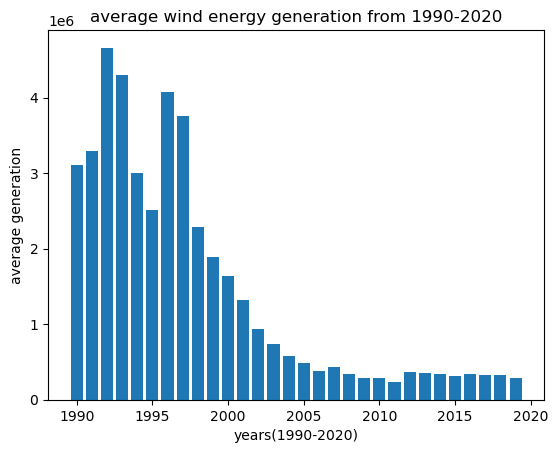

In [266]:
plt.bar(wind_energy.year.value_counts().index,wind_energy.groupby('year')['generation'].mean())
plt.xlabel('years(1990-2020)')
plt.ylabel('average generation')
plt.title('average wind energy generation from 1990-2020')

Text(0.5, 1.0, 'average solar energy generation from 1990-2020')

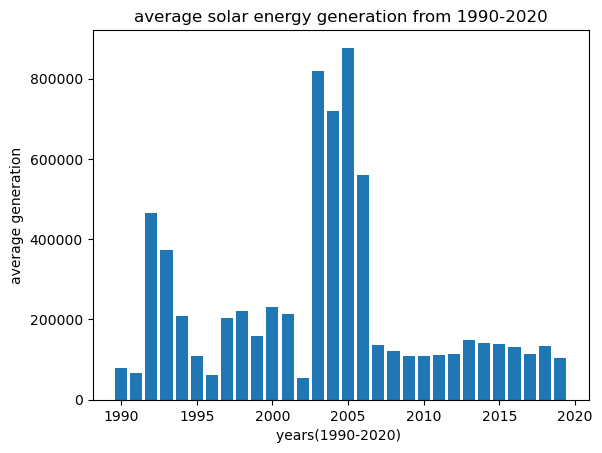

In [202]:
plt.bar(solar_energy.year.value_counts().index,solar_energy.groupby('year')['generation'].mean())
plt.xlabel('years(1990-2020) ')
plt.ylabel('average generation')
plt.title('average solar energy generation from 1990-2020')

In [203]:
ren_energy_source_2018 = ren_energy_source[ren_energy_source.year == 2018]

In [204]:
ren_energy_source_2018.reset_index(drop = True,inplace = True)

In [206]:
ren_energy_source_2018

,year,state,type_of_producer,energy_source,generation
0,2018,AK,Total Electric Power Industry,Wind,155015
1,2018,AK,"Electric Generators, Independent Power Producers",Wind,56327
2,2018,AK,"Electric Generators, Electric Utilities",Wind,98688
3,2018,AL,Total Electric Power Industry,Solar Thermal and Photovoltaic,357252
4,2018,AL,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,326708
...,...,...,...,...,...
278,2018,WY,Total Electric Power Industry,Solar Thermal and Photovoltaic,824
279,2018,WY,Total Electric Power Industry,Wind,4057158
280,2018,WY,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,824
281,2018,WY,"Electric Generators, Independent Power Producers",Wind,1983192


In [207]:
ren_energy_source_2018.groupby('energy_source')['generation'].mean()

energy_source
Solar Thermal and Photovoltaic     818273.294872
Wind                              4293975.677165
Name: generation, dtype: object

Text(0.5, 1.0, 'average clean energy generation in 2018')

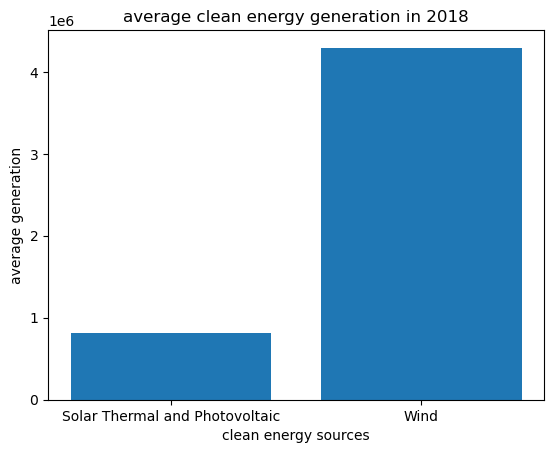

In [208]:
plt.bar(ren_energy_source_2018.groupby('energy_source')['generation'].mean().index,ren_energy_source_2018.groupby('energy_source')['generation'].mean())
plt.xlabel('clean energy sources')
plt.ylabel('average generation')
plt.title('average clean energy generation in 2018')

Text(0.5, 1.0, 'energy sources')

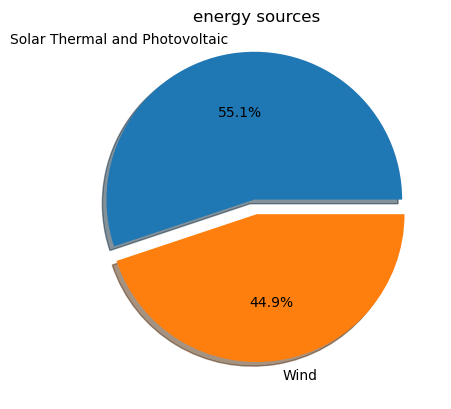

In [211]:
plt.pie(ren_energy_source_2018.energy_source.value_counts(),labels = ren_energy_source_2018.energy_source.value_counts().index,autopct = '%1.1f%%',shadow = True,explode = [0.1,0])
plt.title('energy sources')

In [218]:
ren_energy_source_2018.groupby('state')['generation'].mean().sort_values(ascending = False)

state
TX    17534684.666667
OK         10959941.6
CA     7456205.090909
IA          6098718.0
KS     5404351.142857
ND          5366456.5
MN     3358763.142857
IL          2991258.5
OR          2673046.0
WA     2633929.666667
NM     2480042.333333
CO     2401673.333333
NC     2217716.666667
IN          1909290.0
AZ     1890188.833333
NE     1858739.333333
WV          1769984.0
WY          1623192.8
MI     1592972.857143
UT          1509130.5
NV          1437498.0
ID          1284406.4
NY     1227372.857143
PA     1209797.333333
ME          1198163.5
SD          1134669.6
GA           997918.5
MO      975302.666667
FL           964825.2
MT           874961.6
VA      508714.666667
WI           419335.0
NH           406659.0
OH           373815.4
SC      340329.333333
MS           325853.0
MD      322234.666667
HI           314604.0
NJ      289433.142857
MA           239858.8
AL           238168.0
VT      160028.666667
AR      135608.666667
AK      103343.333333
RI            74988.8
TN  

plt.figure(figsize = (30,20))
plt.barh(ren_energy_source_2018.groupby('state')['generation'].mean().index,ren_energy_source_2018.groupby('state')['generation'].mean())
plt.xlabel('generation')
plt.ylabel('state')
plt.title('clean energy generation according to state in 2019')

# 5 states with higher energy generation in 2018

- north dakota
- california
- lowa
- oklahoma
- texas

# 5 state with lowest energy generation in 2018

- louisiana
- district of columbia
- delaware
- kentucky
- connecticut

# FINDINGS
- 1. TOTAL POWER ELECTRIC INDUSTRY USE IS HIGHEST IN THE PROCESS OF ENERGY GENERATION ACCOUNTING FOR 27.5 % IN THE TOTAL SHARE AND COMBINED HEAT AND POWER , ELECTRIC POWER IS USED LOWEST IN ENERGY GENERATION.

- 2. THE AVERAGE ENERGY GENERATION BY TOTAL ELECTRIC POWER INDUSTRY IS THE HIGHEST IT SHOWS
THAT THE ROLE OF ENERGY GENERATION FOR TOTAL ELECTRIC POWER INDUSTRY IS HIGHEST.
THE LOWEST AVERAGE ENERGY GENERATION IS PRODUCED BY COMBINED HEAT AND POWER COMMERCIAL POWER
- 3. WIND ENERGY GENERATES MUCH MORE ENERGY THAN SOLAR ENERGY. SOLAR ENERGY IS NOT EVEN THE HALF OF THE ENERGY GENERATED BY WIND.
- 4. WIND ENRGY ROSE IN THE PERIOD OF 1990  TO PRE 1995 BUT IT FALLED IN 1995 THAN ROSE IN POST 1995 BUT AFTER IT FALLED DRASTICALY TO A POINT TILL 2019 WHERE IT WAS NOT EVEN IN 1990
- 5. SOLAR ENERGY ROSE FROM 1990 TO MID 1990 AND THEN IT FALLED IN POST 1995 AND THEN IT ROSE TO THE HIGHEST POINT IN 2005 AFTER IT FALLED DRASTICALLY TILL 2019 BUT IT WAS MORE THAN IN THE STARTING POINT.
- 6. SOLAR ENERGY IS USED MORE FOR ENERGY GENERATION THAN WIND ENERGY AND ACCOUNTS FOR 55.1 % OF SHARE BUT STILL ENERGY GENERATION FROM WIND IS MUCH MORE THAN SOLAR ENERGY

- 7.  STATES WHERE THE GENERATION OF CLEAN ENERGY IS HIGH THERE ARE LOW REGISTRATIONS OF ELECTRONIC CARS EXCEPT CALIFORNIA AND TEXAS AND STATES WITH LOWEST OF ENERGY GENERATION DOESN'T MEAN THAT THERE WILL BE LOWEST REGISTRATION OF ELECTRONIC CARS
